In [1]:
#Mount my google drive
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


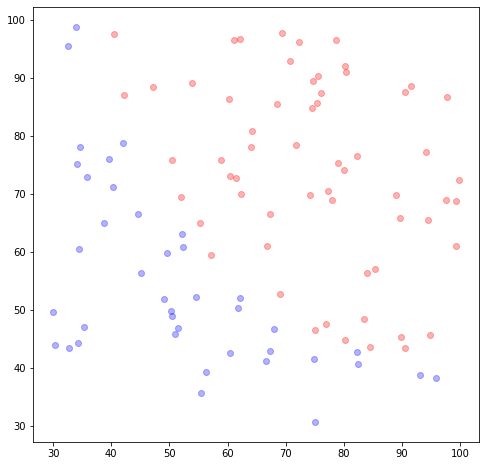

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt

with open('drive/My Drive/machine_learning_data/assignment05/data.txt', newline='') as file:
  data= np.genfromtxt(file, delimiter=',')

x = data[:, 0]
y = data[:, 1]
label = data[:, 2]

x_label0 = x[label == 0]
x_label1 = x[label == 1]

y_label0 = y[label == 0]
y_label1 = y[label == 1]

m = len(x)

# Visualization
# 1. Plot the training data
plt.figure(figsize=(8, 8))
plt.scatter(x_label0, y_label0, alpha=0.3, c='b')
plt.scatter(x_label1, y_label1, alpha=0.3, c='r')
plt.show()

In [0]:
#initialize Train Parameter
theta0 = 1
theta1 = 1
theta2 = -3

In [0]:
#Define linear function & cost function & derivative function of cost function
def zFunc(x, y):
  return theta0 + theta1*x + theta2*y

def sigmaFunc(x, y):
  return 1/(1+np.exp(-1 * zFunc(x, y)))

def j(x, y, label):
  return 1/m * np.sum(((-1 * label) * np.log(sigmaFunc(x, y))) - ((1-label) * np.log(1-sigmaFunc(x, y))))

def jPrimeTheta0(x, y, label):
  return 1/m * np.sum(sigmaFunc(x, y) - label)

def jPrimeTheta1(x, y, label):
  return 1/m * np.sum((sigmaFunc(x, y) - label) * x)

def jPrimeTheta2(x, y, label):
  return 1/m * np.sum((sigmaFunc(x, y) - label) * y)

In [0]:
# Define update Function

learningRate = 0.0025

def updateTheta(x, y, label):
  updateTheta0 = theta0 - (learningRate * jPrimeTheta0(x, y, label))
  updateTheta1 = theta1 - (learningRate * jPrimeTheta1(x, y, label))
  updateTheta2 = theta2 - (learningRate * jPrimeTheta2(x, y, label))

  return updateTheta0, updateTheta1, updateTheta2

In [6]:
#Learning
theta0Value = []
theta1Value = []
theta2Value = []
trainingError = []
counter = 0

while(1):
  counter = counter+1
  theta0Value.append(theta0)
  theta1Value.append(theta1)
  theta2Value.append(theta2)
  trainingError.append(j(x, y, label))

  tempTheta0 = theta0
  tempTheta1 = theta1
  tempTheta2 = theta2

  theta0, theta1, theta2 = updateTheta(x, y, label)
  if (counter%1000) == 0:
    print("Theta0 : "+str(theta0)+" Theta1 : "+str(theta1)+" Theta2 : "+str(theta2))

  if (round(tempTheta0, 8) == round(theta0, 8)) and (round(tempTheta1, 8) == round(theta1, 8)) and (round(tempTheta2, 8) == round(theta2, 8)):
    break

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in multiply
  


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Theta0 : -24.593409978378524 Theta1 : 0.20168934066282895 Theta2 : 0.19687600141425654
Theta0 : -24.593844617905 Theta1 : 0.2016928166108563 Theta2 : 0.1968795187676034
Theta0 : -24.594278914930975 Theta1 : 0.20169628982039217 Theta2 : 0.19688303334883367
Theta0 : -24.59471286974185 Theta1 : 0.20169976029371753 Theta2 : 0.19688654516025786
Theta0 : -24.595146482622685 Theta1 : 0.2017032280331107 Theta2 : 0.19689005420418373
Theta0 : -24.595579753858324 Theta1 : 0.20170669304084837 Theta2 : 0.1968935604829173
Theta0 : -24.596012683733377 Theta1 : 0.2017101553192052 Theta2 : 0.1968970639987627
Theta0 : -24.5964452725322 Theta1 : 0.2017136148704539 Theta2 : 0.19690056475402204
Theta0 : -24.59687752053883 Theta1 : 0.20171707169686462 Theta2 : 0.1969040627509947
Theta0 : -24.597309428036997 Theta1 : 0.2017205258007052 Theta2 : 0.19690755799197776
Theta0 : -24.597740995310314 Theta1 : 0.20172397718424223 Theta2 : 0.19691105047926735
Theta0 : -24.5981722226

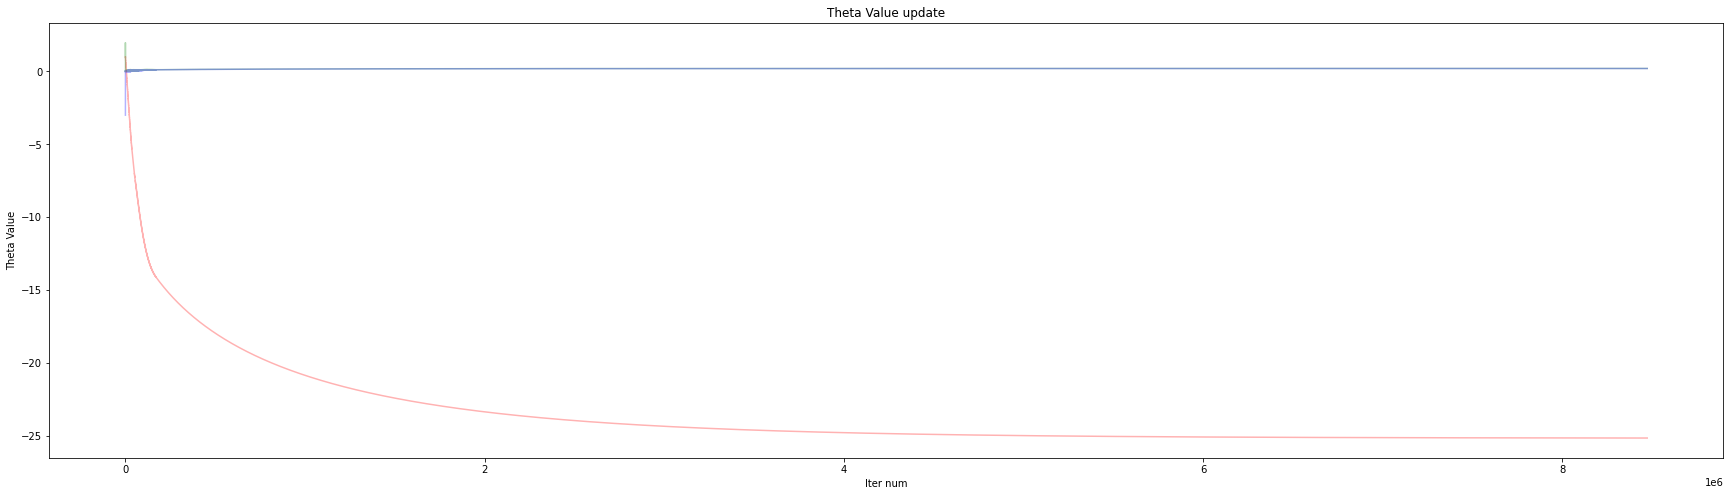

In [7]:
#Visualize of Estimated Parameters

plt.figure(figsize=(30, 8))
plt.plot(range(len(theta0Value)), theta0Value, alpha=0.3, c='r')
plt.plot(range(len(theta1Value)), theta1Value, alpha=0.3, c='g')
plt.plot(range(len(theta2Value)), theta2Value, alpha=0.3, c='b')
plt.title('Theta Value update')
plt.xlabel('Iter num')
plt.ylabel('Theta Value')
plt.show()